# AIN313 - Assignment 3 - b2210765024

## PART I : THEORY QUESTIONS

### Part 1.1

Layer     |   Output Volume Shape  |   Number of parameter

Input     |       127x127x4        |           0

CONV3-10  

POOL-3    

CONV3-10

POOL-2

FC-20     

FC-10     


Define the formula for Output Volume Shape - Number of Parameters

In [ ]:
def calculate_output_volume_shape(input_size, filter_size, number_of_filters,
                   padding, stride):
    output_size = ((input_size - filter_size + 2*padding) / stride) + 1
    output_volume_shape = int(output_size), int(output_size), number_of_filters
    print(f"Output volume shape : {output_volume_shape}")
    return (output_volume_shape)
def calculate_number_of_parameters(filter_size, number_of_filters, input_channels):
    number_of_parameters = (filter_size * filter_size *
                        input_channels + 1) * number_of_filters
    print(f"Number of parameters : {number_of_parameters}")
    return number_of_parameters


CONV3- 10 : 10 filters with 3x3 filter size, 0 padding, 1 stride

In [ ]:
calculate_output_volume_shape(127,3,10,0,1)
calculate_number_of_parameters(3,10,4)
print()

Output volume shape : (125, 125, 10)
Number of parameters : 370



POOL-3 : 3x3 max pooling layer with stride 2 (padding is not in the formula so we will set it to 0)

Pooling doesn't involve parameters to learn. So it will be automatically zero.

In [ ]:
calculate_output_volume_shape(125,3,10,0,2)
print("Number of parameters : 0")
print()

Output volume shape : (62, 62, 10)
Number of parameters : 0



CONV3- 10 : 10 filters with 3x3 filter size, 0 padding, 1 stride

In [ ]:
calculate_output_volume_shape(62,3,10,0,1)
calculate_number_of_parameters(3,10,10)
print()


Output volume shape : (60, 60, 10)
Number of parameters : 910



POOL-2 : 2x2 max pooling layer with stride 2 (padding is not in the formula so we will set it to 0)

Pooling doesn't involve parameters to learn. So it will be automatically zero.

In [ ]:
calculate_output_volume_shape(60,2,10,0,2)
print("Number of parameters : 0")
print()

Output volume shape : (30, 30, 10)
Number of parameters : 0



FC-20 : fully-connected layer with 20 neurons

Output Volume Shape : 1D Vector with size = Number Of Neurons

Number of Parameters : (Input Shape + 1) * Number Of Neurons

In [ ]:
output_volume_shape = (20,)
number_of_parameters = (30*30*10+1) * 20

print(f"Output volume shape : {output_volume_shape}")
print(f"Number of paramaters : {number_of_parameters}")

Output volume shape : (20,)
Number of paramaters : 180020


FC-10 : fully-connected layer with 10 neurons

Output Volume Shape : 1D Vector with size = Number Of Neurons

Number of Parameters : (Input Shape + 1) * Number Of Neurons

In [ ]:
output_volume_shape = (10,)
number_of_parameters = (20 + 1) * 10

print(f"Output volume shape : {output_volume_shape}")
print(f"Number of paramaters : {number_of_parameters}")

Output volume shape : (10,)
Number of paramaters : 210


### Part 1.2

v = w1*x1 + w2*x2 + w3*x3

Output : 1 if v >= 0 and 0 otherwise

Ix = (x1,x2,x3)

W = (3,-5, 2)

In [ ]:
def calculate_output(Ix,W):
    v = 0
    for x , w in zip(Ix,W):
        v += x * w
    if v >= 0:
        print("Output is 1")
        return 1
    else:
        print("Output is 0")
        return 0

In [ ]:
W = (3, -5, 2)

In [ ]:
I1 = (1, 0, 0)

output = calculate_output(I1,W)

Output is 1


In [ ]:
I2 = (0, 1, 1)

output = calculate_output(I2,W)

Output is 0


In [ ]:
I3 = (1, 0, 1)

output = calculate_output(I3,W)

Output is 1


In [ ]:
I4 = (1, 1, 1)

output = calculate_output(I4,W)

Output is 1


### Part 1.3

Neural Network has:

3 Input Layers

5 neurons in 1st hidden layer

3 neurons in 2nd hidden layer

2 output layers

Number of Weights = Number of Neurons in Previous Layer * Number of Neurons in Current Layer

Weights in 1st hidden layer = 3 * 5 = 15

Weights in 2nd hidden layer = 5 * 3 = 15

Weights in output layer = 3 * 2 = 6

If we sum it up we get 15 + 15 + 6 = 36 weight variables the network has in total.


#### If we consider the network fully connected:

Number of Weights = (Number of Neurons in Previous Layer + 1) * Number of Neurons in Current Layer

Weights in 1st hidden layer = (3+1) * 5 = 20

Weights in 2nd hidden layer = (5+1) * 3 = 18

Weights in output layer = (3+1) * 2 = 8

If we sum it up we get 20 + 18 + 8 = 46 weight variables the network has in total if it is fully connected.

To describe the dependency information for nodes in a neural network, we can specify the connections between nodes in both the forward and backward (backpropagation) passes. In a fully connected feedforward neural network, each node in a layer is connected to every node in the previous layer.

In forward pass,

All neurons in 1st hidden layer depends on the values on input layers.

All neurons in 2nd hidden layer depends on the values on 1st hidden layer.

All values in putput layer depends on neurons on 2nd hidden layer.

In backward pass, (Backpropogation)

Input layer depends on the partial derivatives of the neurons in 1st hidden layer with respect to the loss function.

1st hidden layer depends on the partial derivatives of the neurons in 2nd hidden layer with respect to the loss function.

2nd hidden layer depends on the partial derivatives of the values in output layer with respect to the loss function.


That being said, this means input layer depends on the all the weights in the network, 1st hidden layer depends on all values except the input layer and so on. This is the logic of back propogation.

## PART 2 : CLASSIFICATION OF MEL SPECTOGRAM IMAGES USING NEURAL NETWORK

### Preprocess the data

Import necessary libraries

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import os
from google.colab import drive
import zipfile
from sklearn.preprocessing import OneHotEncoder

Access the dataset

In [ ]:
drive.mount('/content/drive')
root = '/content/extracted_files/voice_dataset'

Mounted at /content/drive


In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/dataset_a3.zip', 'r') as zip_file:
  zip_file.extractall('/content/extracted_files')

In [ ]:
train = pd.read_csv(os.path.join(root,'train_data.csv'))
test = pd.read_csv(os.path.join(root,'test_data.csv'))

Encode 'Age' column using One Hot Encoding


In [ ]:
# Get dummies for age column
train_age_dummies = pd.get_dummies(train['age'])
test_age_dummies = pd.get_dummies(test['age'])
# Drop the original column
train = train.drop(['age'], axis = 1)
test = test.drop(['age'], axis = 1)
# Add new columns
train = pd.concat([train, train_age_dummies], axis = 1)
test = pd.concat([test, test_age_dummies], axis = 1)

Split the dataset into train and test

In [ ]:
# Train - test split, also drop all columns except filename and age
train_labels = train.drop(['filename','text','gender','accent'], axis = 1)
train_images = train['filename']

test_labels = test.drop(['filename','text','gender','accent'], axis = 1)
test_images = test['filename']

Define a function that grayscales the image

In [ ]:
def rgba_to_grayscale(image):
  # Extract the color channels (R, G, B, A)
  r, g, b, a = image[:, :, 0], image[:, :, 1], image[:, :, 2], image[:, :, 3]

  # Convert to grayscale using the luminosity method
  grayscale_intensity = 0.299 * r + 0.587 * g + 0.114 * b

  # Stack the grayscale intensity to create a single-channel image
  grayscale_image = np.stack([grayscale_intensity], axis=-1)

  return grayscale_image

Define a function that returns the array of pixels of the corresponding image after resizing, normalizing and grayscaling it

In [ ]:
def filename_to_pixel_array(filename,dataset):
    if dataset == 'train':
        image = Image.open(os.path.join(root,'train/' + filename)) # 775,308
        #resize
        new_size = (32,32)
        image = image.resize(new_size)

        image_array = np.array(image)
        #gray-scale - made it run really faster
        image_array = rgba_to_grayscale(image_array)
        #normalize
        image_array = image_array / 255.0

        return image_array
    elif dataset == 'test':
        image = Image.open(os.path.join(root,'test/'+ filename))
        #resize
        new_size = (32,32)
        image = image.resize(new_size)
        image_array = np.array(image)
        #gray-scale
        image_array = rgba_to_grayscale(image_array)
        #normalize
        image_array = image_array / 255.0

        return image_array

Replace 'filename' column with the pixel array representations of the corresponding files

In [ ]:
num_images = len(train_images)
# Initialize a empty array to hold pixels
arrays_train = np.empty((num_images, 32, 32, 1), dtype=np.float64)

for index_count, filename in enumerate(train_images):
  # Add the returned arrays to the initialized array
    arrays_train[index_count] = filename_to_pixel_array(filename, 'train')

In [ ]:
num_images_test = len(test_images)

arrays_test = np.empty((num_images_test, 32, 32, 1), dtype=np.float64)

for index_count, filename in enumerate(test_images):
    arrays_test[index_count] = filename_to_pixel_array(filename, 'test')

### Implement a n-hidden layer neural network

Reformat the data to fit into the model

In [ ]:
arrays_train_mlp = arrays_train.reshape(9600,1024) # 32 * 32 = 1024
arrays_test_mlp = arrays_test.reshape(2400,1024)
train_labels_mlp = train_labels.to_numpy()
test_labels_mlp = test_labels.to_numpy()

In [ ]:
def ReLU(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    # Derivative of tanh function: sech^2(x)
    return 1.0 - np.tanh(x)**2

def negative_log_likelihood(y_true, y_pred):
  epsilon = 1e-15
  y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
  return -np.sum(y_true * np.log(y_pred)) / len(y_true)

In [ ]:
class MLP:
    def __init__(self, num_layers, input_size, hidden_sizes, output_size, acc_func, acc_func_derv, learning_rate=0.01, epochs=10, batch_size = 192):
        self.input_size = input_size
        self.num_layers = num_layers
        self.sizes = hidden_sizes
        self.sizes.insert(0, input_size)
        self.sizes.append(output_size)
        self.output_size = output_size
        self.acc_func = acc_func
        self.acc_func_derv = acc_func_derv
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.weights = [np.random.randn(self.sizes[i], self.sizes[i + 1]) for i in range(num_layers + 1)] # Randomly initialize weights
        self.bias = [np.zeros((1, self.sizes[i + 1])) for i in range(num_layers + 1)] # Initialize biases to zero
        self.activations = [] # Array that holds every activation function output on every step in neural network
        self.passes = [] # Array that holds every layer output in every step
        self.loss = 0

    def forward_pass(self, X):
        self.activations.append(X)
        for step in range(self.num_layers + 1):
            pass1 = X.dot(self.weights[step]) + self.bias[step]
            self.passes.append(pass1)

            activation = self.acc_func(pass1)
            self.activations.append(activation)
            X = activation
        return activation

    def backward_pass(self, y):
        error = self.activations[-1] - y
        for step in range(self.num_layers, -1, -1):
            d_weights = self.activations[step].T.dot(error * self.acc_func_derv(self.passes[step]))
            d_bias = np.sum(error * self.acc_func_derv(self.passes[step]), axis=0, keepdims=True)
            error = error.dot(self.weights[step].T)

            self.weights[step] -= self.learning_rate * d_weights
            self.bias[step] -= self.learning_rate * d_bias

    def calculate_loss(self, y_true, y_pred):
        return negative_log_likelihood(y_true, y_pred)

    def fit(self, X, y):
        num_samples = X.shape[0]
        outer_losses = []
        for epoch in range(self.epochs):
            inner_losses = []
            for batch_start in range(0, num_samples, self.batch_size):
                batch_end = min(batch_start + self.batch_size, num_samples)

                X_batch = X[batch_start:batch_end]
                y_batch = y[batch_start:batch_end]
                y_pred = self.forward_pass(X_batch)

                inner_losses.append(self.calculate_loss(y_batch, y_pred))

                self.backward_pass(y_batch)
            outer_losses.append(np.mean(inner_losses)) #Mean of the losses for each batch
            print(f'Epoch {epoch+1}/{self.epochs}, Loss: {np.mean(inner_losses)}')
        self.loss = np.mean(outer_losses) # Mean of the losses for each epcoh
    def predict(self, X):
        return self.forward_pass(X)

In [ ]:
def create_mlp(num_layers, input_size, hidden_sizes, output_size, acc_f, acc_f_derv,learning_rate, epochs, batch_size,X_train,y_train,X_test,y_test):
  mlp = MLP(num_layers, input_size, hidden_sizes, output_size,acc_f,acc_f_derv,learning_rate, epochs, batch_size)
  mlp.fit(X_train,y_train)

  y_pred = mlp.predict(X_test)

  acc = np.mean(y_pred == y_test)
  print(f"Accuracy: {acc:.2f}")
  print(f"Mean Loss: {mlp.loss:.2f}")

Tests are done with this lines of code: (Can be run again)

In [ ]:
create_mlp(0,1024,[],6,ReLU,relu_derivative,0.1,10,192,arrays_train_mlp,train_labels_mlp,arrays_test_mlp,test_labels_mlp) # 0 Layer with ReLU
print()
create_mlp(0,1024,[],6,tanh,tanh_derivative,0.1,10,192,arrays_train_mlp,train_labels_mlp,arrays_test_mlp,test_labels_mlp) # 0 Layer with tanh
print()
create_mlp(1,1024,[2],6,ReLU,relu_derivative,0.1,10,192,arrays_train_mlp,train_labels_mlp,arrays_test_mlp,test_labels_mlp) # 1 Layer with ReLU
print()
create_mlp(1,1024,[2],6,tanh,tanh_derivative,0.1,10,192,arrays_train_mlp,train_labels_mlp,arrays_test_mlp,test_labels_mlp) # 1 Layer with tanh
print()
create_mlp(2,1024,[2,2],6,ReLU,relu_derivative,0.1,10,192,arrays_train_mlp,train_labels_mlp,arrays_test_mlp,test_labels_mlp) # 2 Layer with size 2 with ReLU
print()
create_mlp(2,1024,[3,3],6,ReLU,relu_derivative,0.1,10,192,arrays_train_mlp,train_labels_mlp,arrays_test_mlp,test_labels_mlp) # 2 Layer with size 3 with ReLU
print()
create_mlp(2,1024,[3,3],6,ReLU,relu_derivative,0.5,10,192,arrays_train_mlp,train_labels_mlp,arrays_test_mlp,test_labels_mlp) # 2 Layer with size 3 with 0.08 learning rate
print()
create_mlp(2,1024,[3,3],6,ReLU,relu_derivative,0.5,10,96,arrays_train_mlp,train_labels_mlp,arrays_test_mlp,test_labels_mlp) # 2 Layer with size 3 with 0.08 learning rate, 96 batch_size

Epoch 1/10, Loss: 32.57104422623401
Epoch 2/10, Loss: 33.757595443348116
Epoch 3/10, Loss: 34.364209131761385
Epoch 4/10, Loss: 33.233299777677445
Epoch 5/10, Loss: 33.50952473826137
Epoch 6/10, Loss: 33.9208486921551
Epoch 7/10, Loss: 34.00980133924417
Epoch 8/10, Loss: 34.364209131761385
Epoch 9/10, Loss: 33.71582595695162
Epoch 10/10, Loss: 34.364209131761385
Accuracy: 0.83
Mean Loss: 33.78

Epoch 1/10, Loss: 7.15890486415796
Epoch 2/10, Loss: 9.359298003885819
Epoch 3/10, Loss: 7.543127776367665
Epoch 4/10, Loss: 7.772532080550174
Epoch 5/10, Loss: 7.326293427942001
Epoch 6/10, Loss: 8.721962116349006
Epoch 7/10, Loss: 8.75665753622015
Epoch 8/10, Loss: 8.63419667385676
Epoch 9/10, Loss: 7.630604168952577
Epoch 10/10, Loss: 7.07717499166677
Accuracy: 0.08
Mean Loss: 8.00

Epoch 1/10, Loss: 29.47326105677452
Epoch 2/10, Loss: 31.031133510205173
Epoch 3/10, Loss: 31.15082240033089
Epoch 4/10, Loss: 30.252308654335717
Epoch 5/10, Loss: 30.22142934554685
Epoch 6/10, Loss: 29.6587785640

To run this data needs to be reformatted again:

In [ ]:
create_mlp(2,4096,[3,3],6,ReLU,relu_derivative,0.08,10,192,arrays_train,train_labels,arrays_test,test_labels) # 2 Layer with size 3 with 0.08 learning rate, with 64*64 input size,

Here is the table of evaluation for each fit.

| Experiment | Input Size | Activation Function | Number of Layers | Hidden Layer Size | Learning Rate | Batch Size | Mean Loss | Accuracy |
|------------|------------|----------------------|-------------------|---------------------|----------------|------------|-----------|----------|
| 1          | 32x32x1    | ReLU                 | 0                 | 0                   | 0.1           | 192        | 33.78    | 0.83     |
| 2          | 32x32x1    | tanh                 | 0                 | 0                   | 0.1           | 192        | 8.00      | 0.08     |
| 3          | 32x32x1    | ReLU                 | 1                 | 2                   | 0.1           | 192        | 23.87     | 0.83     |
| 4          | 32x32x1    | tanh                 | 1                 | 2                   | 0.1           | 192        | 14.25    | 0.06    |
| 5          | 32x32x1    | ReLU                 | 2                 | 2                   | 0.1           | 192        | 32.24     | 0.83     |
| 6          | 32x32x1    | ReLU                 | 2                 | 3                   | 0.1           | 192        | 28.23    | 0.69     |
| 7          | 32x32x1    | ReLU                 | 2                 | 3                   | 0.1           | 192        | 30.79     | 0.83     |
| 8          | 32x32x1    | ReLU                 | 2                 | 3                   | 0.5           | 96         | 34.22     | 0.83     |
| 9          | 64x64x1    | ReLU                 | 2                 | 3                   | 0.5           | 192        | 33.92     | 0.83     |


#### Observation for MLP:

#### Activation Function:

ReLU greatly outperforms tanh in all cases.
#### Hidden Layers:

Adding second hidden layer doesn't always boost performance.

Larger hidden layers enhance model performance.

Experiment 6 with size 3 shows notable improvement.

#### Learning Rate and Batch Size:

Experiment 7, with higher learning rate and batch size, performs well.

#### Input Size:

Experiment 9 with a larger input size has minimal impact on model.

#### Conclusion:

ReLU, appropriate hidden layer size, and tuned hyperparameters yield better performance.

Experiment 7 achieves the highest accuracy with lowest loss.

Fine-tuning hyperparameters can enhance performance even more. But in this form, it can be concluded that data overfits to the model.

### Implement CNN on the images of the dataset

CNN with n-Convolutional layer and n-Fully connected layer

In [ ]:
def create_fit_cnn(n, X_train, y_train, X_test, y_test, epochs, batch_size,activation):
    model_cnn = models.Sequential()

    for i in range(n):
      # Construct the model
      if i == 0:
        input_shape = (32, 32, 1)
        model_cnn.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=input_shape))
      else:
        model_cnn.add(layers.Conv2D(32, (3, 3), activation=activation))
        model_cnn.add(layers.MaxPooling2D(3, 3))


    model_cnn.add(layers.Flatten())
    model_cnn.add(layers.Dense(128, activation=activation))
    model_cnn.add(layers.Dense(6, activation='softmax'))
                      optimizer='adam',
                      metrics=['accuracy'])
    # Evaluate the model
    history = model_cnn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
    test_loss, test_acc = model_cnn.evaluate(arrays_test,  test_labels, verbose=2)
    # Visualize the model
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.title("Accuracies")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.show()
    return test_loss, test_acc, model_cnn

Tests are done with this lines of code: (Can be run again)

Epoch 1/10
50/50 [==============================] - 12s 186ms/step - loss: 1.7924 - accuracy: 0.2016 - val_loss: 1.7515 - val_accuracy: 0.2463
Epoch 2/10
50/50 [==============================] - 11s 228ms/step - loss: 1.7179 - accuracy: 0.2782 - val_loss: 1.7353 - val_accuracy: 0.2617
Epoch 3/10
50/50 [==============================] - 10s 204ms/step - loss: 1.6641 - accuracy: 0.3192 - val_loss: 1.6714 - val_accuracy: 0.3033
Epoch 4/10
50/50 [==============================] - 10s 200ms/step - loss: 1.6210 - accuracy: 0.3441 - val_loss: 1.6347 - val_accuracy: 0.3542
Epoch 5/10
50/50 [==============================] - 13s 257ms/step - loss: 1.5758 - accuracy: 0.3767 - val_loss: 1.5968 - val_accuracy: 0.3604
Epoch 6/10
50/50 [==============================] - 11s 219ms/step - loss: 1.5452 - accuracy: 0.3886 - val_loss: 1.6020 - val_accuracy: 0.3525
Epoch 7/10
50/50 [==============================] - 10s 200ms/step - loss: 1.5137 - accuracy: 0.4081 - val_loss: 1.5527 - val_accuracy: 0.3913

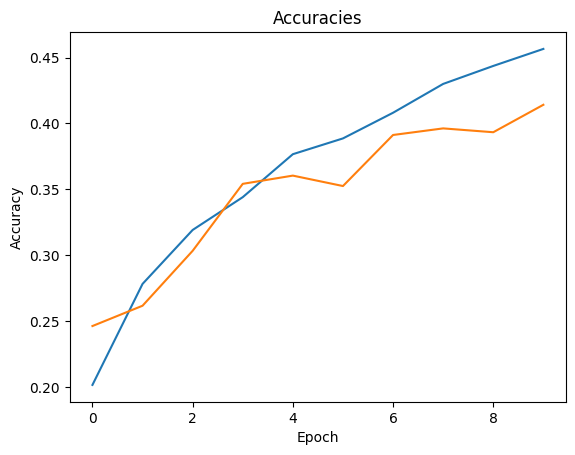

Test loss is 1.5030776262283325 and test accuracy is 0.414166659116745
Epoch 1/10
50/50 [==============================] - 12s 234ms/step - loss: 2.4275 - accuracy: 0.1926 - val_loss: 1.7667 - val_accuracy: 0.2079
Epoch 2/10
50/50 [==============================] - 10s 197ms/step - loss: 1.7539 - accuracy: 0.2214 - val_loss: 1.7532 - val_accuracy: 0.2483
Epoch 3/10
50/50 [==============================] - 11s 210ms/step - loss: 1.7352 - accuracy: 0.2496 - val_loss: 1.7302 - val_accuracy: 0.2612
Epoch 4/10
50/50 [==============================] - 12s 233ms/step - loss: 1.7105 - accuracy: 0.2794 - val_loss: 1.7147 - val_accuracy: 0.2696
Epoch 5/10
50/50 [==============================] - 9s 181ms/step - loss: 1.6853 - accuracy: 0.2931 - val_loss: 1.6852 - val_accuracy: 0.3000
Epoch 6/10
50/50 [==============================] - 12s 242ms/step - loss: 1.6481 - accuracy: 0.3277 - val_loss: 1.6722 - val_accuracy: 0.3088
Epoch 7/10
50/50 [==============================] - 12s 236ms/step - los

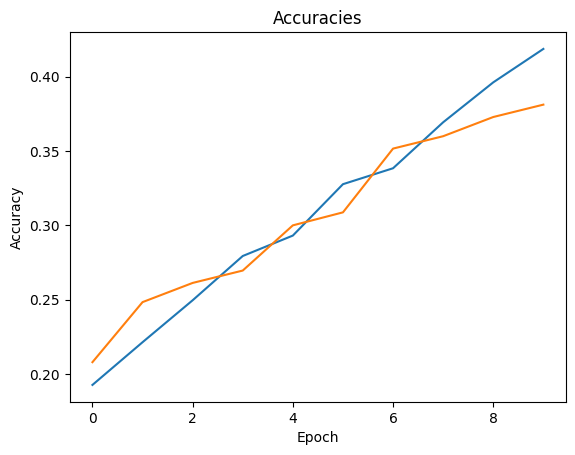

Test loss is 1.5461989641189575 and test accuracy is 0.3812499940395355
Epoch 1/10
50/50 [==============================] - 20s 385ms/step - loss: 1.7772 - accuracy: 0.2089 - val_loss: 1.7502 - val_accuracy: 0.2733
Epoch 2/10
50/50 [==============================] - 19s 383ms/step - loss: 1.7314 - accuracy: 0.2659 - val_loss: 1.7190 - val_accuracy: 0.2675
Epoch 3/10
50/50 [==============================] - 20s 396ms/step - loss: 1.6918 - accuracy: 0.2910 - val_loss: 1.6860 - val_accuracy: 0.2967
Epoch 4/10
50/50 [==============================] - 21s 417ms/step - loss: 1.6481 - accuracy: 0.3202 - val_loss: 1.6567 - val_accuracy: 0.3142
Epoch 5/10
50/50 [==============================] - 19s 382ms/step - loss: 1.6110 - accuracy: 0.3459 - val_loss: 1.6258 - val_accuracy: 0.3450
Epoch 6/10
50/50 [==============================] - 19s 382ms/step - loss: 1.5784 - accuracy: 0.3660 - val_loss: 1.5865 - val_accuracy: 0.3479
Epoch 7/10
50/50 [==============================] - 19s 386ms/step - l

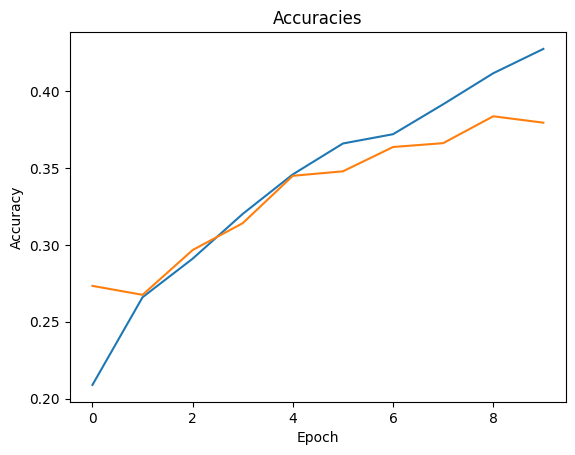

Test loss is 1.5665338039398193 and test accuracy is 0.37958332896232605
Epoch 1/10
50/50 [==============================] - 21s 401ms/step - loss: 1.7689 - accuracy: 0.2336 - val_loss: 1.7350 - val_accuracy: 0.2683
Epoch 2/10
50/50 [==============================] - 21s 430ms/step - loss: 1.6886 - accuracy: 0.2950 - val_loss: 1.6681 - val_accuracy: 0.3125
Epoch 3/10
50/50 [==============================] - 21s 412ms/step - loss: 1.6324 - accuracy: 0.3378 - val_loss: 1.6357 - val_accuracy: 0.3271
Epoch 4/10
50/50 [==============================] - 20s 397ms/step - loss: 1.5827 - accuracy: 0.3684 - val_loss: 1.5980 - val_accuracy: 0.3542
Epoch 5/10
50/50 [==============================] - 20s 396ms/step - loss: 1.5416 - accuracy: 0.3918 - val_loss: 1.5760 - val_accuracy: 0.3600
Epoch 6/10
50/50 [==============================] - 20s 399ms/step - loss: 1.5010 - accuracy: 0.4131 - val_loss: 1.6011 - val_accuracy: 0.3487
Epoch 7/10
50/50 [==============================] - 22s 430ms/step - 

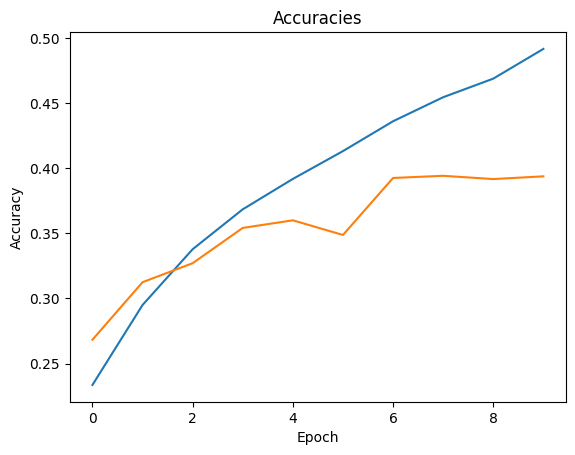

Test loss is 1.5520551204681396 and test accuracy is 0.39375001192092896
Epoch 1/10
100/100 [==============================] - 20s 196ms/step - loss: 1.7830 - accuracy: 0.2023 - val_loss: 1.7680 - val_accuracy: 0.2267
Epoch 2/10
100/100 [==============================] - 19s 193ms/step - loss: 1.7484 - accuracy: 0.2489 - val_loss: 1.7396 - val_accuracy: 0.2546
Epoch 3/10
100/100 [==============================] - 20s 196ms/step - loss: 1.7188 - accuracy: 0.2655 - val_loss: 1.7115 - val_accuracy: 0.2642
Epoch 4/10
100/100 [==============================] - 22s 218ms/step - loss: 1.6815 - accuracy: 0.2960 - val_loss: 1.6711 - val_accuracy: 0.2946
Epoch 5/10
100/100 [==============================] - 20s 198ms/step - loss: 1.6363 - accuracy: 0.3336 - val_loss: 1.6403 - val_accuracy: 0.3200
Epoch 6/10
100/100 [==============================] - 19s 194ms/step - loss: 1.5938 - accuracy: 0.3499 - val_loss: 1.5896 - val_accuracy: 0.3483
Epoch 7/10
100/100 [==============================] - 20s

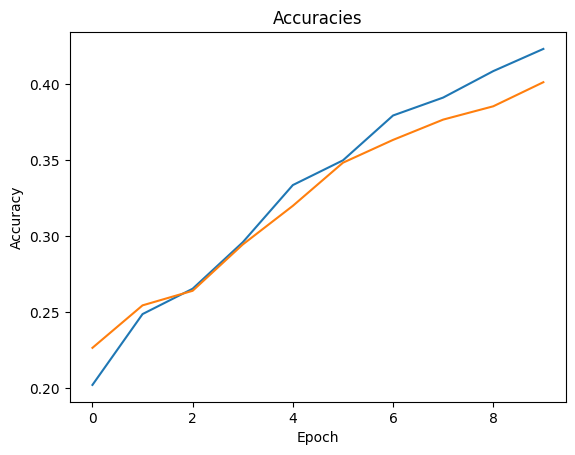

Test loss is 1.5312614440917969 and test accuracy is 0.4012500047683716


In [ ]:
test_loss_1, test_acc_1, model_cnn_1 = create_fit_cnn(1, arrays_train, train_labels, arrays_test, test_labels, 10, 192, 'relu')
print(f"Test loss is {test_loss_1} and test accuracy is {test_acc_1}")
test_loss_2, test_acc_2, model_cnn_2 = create_fit_cnn(1, arrays_train, train_labels, arrays_test, test_labels, 10, 192, 'tanh')
print(f"Test loss is {test_loss_2} and test accuracy is {test_acc_2}")
test_loss_3, test_acc_3, model_cnn_3 = create_fit_cnn(2, arrays_train, train_labels, arrays_test, test_labels, 10, 192, 'relu')
print(f"Test loss is {test_loss_3} and test accuracy is {test_acc_3}")
test_loss_4, test_acc_4, model_cnn_4 = create_fit_cnn(2, arrays_train, train_labels, arrays_test, test_labels, 10, 192, 'tanh')
print(f"Test loss is {test_loss_4} and test accuracy is {test_acc_4}")
test_loss_5, test_acc_5, model_cnn_5 = create_fit_cnn(2, arrays_train, train_labels, arrays_test, test_labels, 10, 96, 'relu')
print(f"Test loss is {test_loss_5} and test accuracy is {test_acc_5}")

To run this data needs to be reformatted again:

Epoch 1/10
50/50 [==============================] - 70s 1s/step - loss: 2.2388 - accuracy: 0.1805 - val_loss: 1.7694 - val_accuracy: 0.2100
Epoch 2/10
50/50 [==============================] - 60s 1s/step - loss: 1.7497 - accuracy: 0.2456 - val_loss: 1.7436 - val_accuracy: 0.2508
Epoch 3/10
50/50 [==============================] - 62s 1s/step - loss: 1.7099 - accuracy: 0.2873 - val_loss: 1.7165 - val_accuracy: 0.2587
Epoch 4/10
50/50 [==============================] - 65s 1s/step - loss: 1.6742 - accuracy: 0.3137 - val_loss: 1.6975 - val_accuracy: 0.2804
Epoch 5/10
50/50 [==============================] - 65s 1s/step - loss: 1.6311 - accuracy: 0.3396 - val_loss: 1.6640 - val_accuracy: 0.3083
Epoch 6/10
50/50 [==============================] - 59s 1s/step - loss: 1.5803 - accuracy: 0.3728 - val_loss: 1.6692 - val_accuracy: 0.2975
Epoch 7/10
50/50 [==============================] - 60s 1s/step - loss: 1.5227 - accuracy: 0.4119 - val_loss: 1.6661 - val_accuracy: 0.3225
Epoch 8/10
50/50 [==

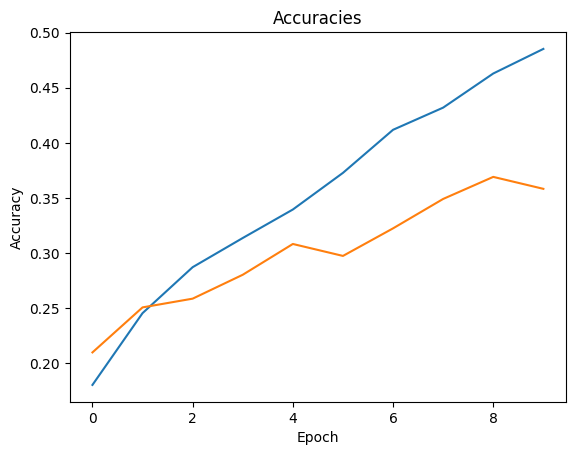

Test loss is 1.5904172658920288 and test accuracy is 0.3583333194255829
Epoch 1/10
100/100 [==============================] - 97s 961ms/step - loss: 1.7943 - accuracy: 0.1715 - val_loss: 1.7872 - val_accuracy: 0.1887
Epoch 2/10
100/100 [==============================] - 100s 1s/step - loss: 1.7667 - accuracy: 0.2201 - val_loss: 1.7506 - val_accuracy: 0.2400
Epoch 3/10
100/100 [==============================] - 112s 1s/step - loss: 1.7344 - accuracy: 0.2592 - val_loss: 1.7295 - val_accuracy: 0.2550
Epoch 4/10
100/100 [==============================] - 94s 944ms/step - loss: 1.7044 - accuracy: 0.2812 - val_loss: 1.7026 - val_accuracy: 0.2808
Epoch 5/10
100/100 [==============================] - 96s 961ms/step - loss: 1.6715 - accuracy: 0.3079 - val_loss: 1.7146 - val_accuracy: 0.2700
Epoch 6/10
100/100 [==============================] - 93s 933ms/step - loss: 1.6406 - accuracy: 0.3230 - val_loss: 1.6594 - val_accuracy: 0.3067
Epoch 7/10
100/100 [==============================] - 93s 924m

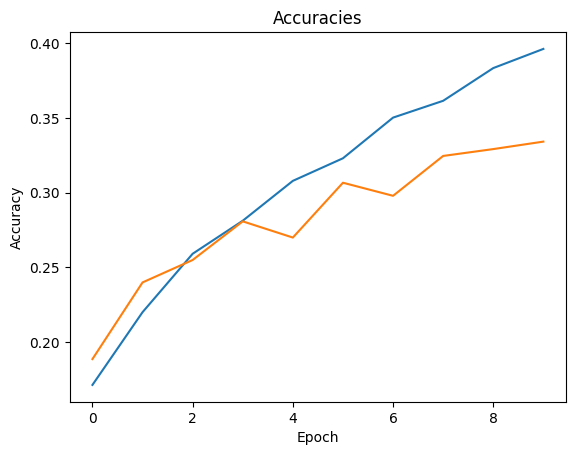

Test loss is 1.6308726072311401 and test accuracy is 0.33416667580604553


In [ ]:
test_loss_6, test_acc_6, model_cnn_6 = create_fit_cnn(1, arrays_train, train_labels, arrays_test, test_labels, 10, 192, 'relu')
print(f"Test loss is {test_loss_6} and test accuracy is {test_acc_6}")
test_loss_7, test_acc_7, model_cnn_7 = create_fit_cnn(2, arrays_train, train_labels, arrays_test, test_labels, 10, 96, 'relu')
print(f"Test loss is {test_loss_7} and test accuracy is {test_acc_7}")

Here is the table of evaluation for each fit.

| Experiment | Input Size | Activation Function | Number of Layers | Batch Size | Mean Loss | Accuracy |
|------------|------------|----------------------|-------------------|------------|-----------|----------|
| 1          | 32x32x1    | ReLU                 | 1                 | 192        | 1.50      | 0.41     |
| 2          | 32x32x1    | tanh                 | 1                 | 192        | 1.54      | 0.38     |
| 3          | 32x32x1    | ReLU                 | 2                 | 192        | 1.56      | 0.38     |
| 4          | 32x32x1    | tanh                 | 2                 | 192        | 1.55      | 0.39     |
| 5          | 32x32x1    | ReLU                 | 2                 | 96         | 1.53      | 0.40     |
| 6          | 64x64x1    | ReLU                 | 1                 | 96         | 1.59      | 0.36     |
| 7          | 64x64x1    | ReLU                 | 1                 | 192        | 1.63      | 0.33     |


#### Observation for CNN:

ReLU activation (Experiments 1, 3, 5, 6, 7) generally outperforms tanh activation (Experiments 2, 4) across various configurations.

Adding a second layer (Experiments 3, 4, 5) doesn't consistently improve performance and, in some cases, slightly reduces accuracy.

Smaller batch sizes (Experiments 5, 6) tend to have a positive impact on accuracy.

Larger input size (Experiment 6 with 64x64x1) doesn't consistently result in better performance and may slightly decrease accuracy. Also, it converged very slow.

Mean loss values are relatively close, indicating consistent training across experiments.

P.S : A custom learning rate is not used on CNN because when applied a custom optimizer, model yielded no more than 0.2 accuracy.

#### Conclusion:

ReLU activation is generally preferable.
The impact of the number of layers and input size is not uniform.
Smaller batch sizes can contribute to improved accuracy.
Fine-tuning specific configurations may be necessary for optimal performance.

### Comparison of MLP and CNN on the table

#### Common Trends:

Both tables explore different configurations of neural networks with ReLU and tanh activations.
Larger input sizes (64x64x1) are tested in both tables.

#### MLP vs. CNN:

The CNN table explores fewer hyperparameters (e.g., no hidden layer size) due to the convolutional nature of the networks.
MLP achieves higher accuracy (up to 0.83) compared to CNN (up to 0.41).
Mean loss values in the MLP table are relatively higher, suggesting potential overfitting.

#### Batch Size Impact:

In the MLP table, Experiment 8 with a reduced batch size shows a slight increase in accuracy.
In the CNN table, smaller batch sizes (Experiments 5, 6) also exhibit positive impacts on accuracy.

#### Learning Rate Impact:

In the MLP table, Experiment 7 with an increased learning rate achieves the highest accuracy.
The CNN table does not explicitly explore the learning rate. Because when applied a custom optimizer, model's accuracy was too low as explained in the CNN table's observations.

#### Conclusion:

MLPs outperform CNNs in terms of accuracy in the provided experiments.
Impact of input size, activation functions, and batch size is observed in both MLP and CNN configurations.
In this position, correct model to pick would be CNN even though it yielded lower accuracy because it doesn't overfit to data. With more exploration and fine-tuning hyperparameters, CNN would outperform the custom MLP structure implemented.

## REPORT

### Introduction
This assignment comprises two main parts: theoretical questions and a classification task on mel spectrograms.

In Part 1, a detailed examination of a Convolutional Neural Network (CNN) is conducted, analyzing the input through convolutions, poolings, and fully connected layers. Python is employed to calculate Output Volume Shapes and Number of Parameters at each step. Additionally, given a neural network formula, outputs are computed, and specific parameters are derived based on network specifications.

In Part 2, the task involves image classification using MLP and CNN on a dataset of audio samples visualized as images through frequencies. The objective is to classify the age of the voice owner.

### Data Preprocessing
Data is imported from Google Drive, extracted from a zip file, and read as a comma-separated values (csv) file.

The target feature (age) is one-hot encoded, and other columns, excluding the filename column containing file paths, are retained. Functions for grayscaling images using the luminosity method (made the program run faster), reading file paths to import the corresponding images, resizing, grayscaling, normalizing pixels, and returning images as arrays are implemented. These arrays are iteratively incorporated into the dataframe, rendering the data ready for model input.

### MLP Implementation and Experiments
After preprocessing, an MLP model is implemented using only NumPy, with guidance from a GitHub source. Activation functions (ReLU and tanh) and their derivatives are implemented, followed by the loss function (negative likelihood).

The system is encapsulated as a class with various attributes. Experiments with different hyperparameters are conducted and interpreted through a table.

#### Observations from the experiments for MLP:

-ReLU achieved higher accuracy compared to tanh, making it a more suitable activation function.

Increasing hidden layer size generally improved performance.

-A higher learning rate generally led to higher accuracy within a reasonable boundary.

-Reduced batch size yielded better performance in experiments.

-The model exhibited signs of overfitting on the data, as discussed in more detail in the corresponding section.

### CNN Implementation and Experiments
The CNN system is implemented with TensorFlow using models.Sequential.

A function is created to construct, fit, and evaluate a CNN model, employing softmax activation and categorical cross-entropy (negative likelihood).
Experiments with different hyperparameters are conducted, and validation accuracy vs. test accuracy is visualized in a plot for each call.

#### Observations from the experiments:

-ReLU had slightly higher accuracy compared to tanh.

-Smaller batch size tended to have a positive impact on accuracy.

-Larger input size converged very slowly and didn’t consistently result in better performance.

### Model Comparison

A comparison of MLP and CNN is presented using tables.

Key findings include:

-Loss values and accuracy are higher in MLP, indicating overfitting.

-Smaller batch sizes improved accuracy in both models.

In summary, CNN demonstrates more consistency, despite lower accuracy (and lower loss), while MLP exhibits higher accuracy but higher loss, indicating overfitting.

### Conclusion

This assignment involved an in-depth exploration of MLP and CNN models, applied to a mel spectrogram dataset. It was concluded that with better fine-tuning, CNN would likely outperform MLP in image processing tasks.